### **Project name:Heart Disease Prediction Using Machine Learning**
The leading cause of death in the developed world is heart disease. Therefore there needs to be work done to help prevent the risks of of having a heart attack.
This notebook uses python and many helpful libraries to predict whether or not a patient has heart disease based on 14 attributes such as (blood pressure, cholestoral levels, chest pain, and other attributes)

**----By Md. Azim Khan**

**Import required libraries**

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

**Import Data**

In [54]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header = None)

In [55]:
# show some observation from dataset.
display(df.head(5))
display(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(303, 14)

**Comment:** From dataset, columns names are numerical, it needs to change. Now column name change according to website information.

In [56]:
# change the column name
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [57]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Explanation of Feature and Target variable:**
1. age = age in years, **Float**
2. sex = (1 = male; 0 = female),** Category**
3. cp = cp: chest pain type , **Category**
* Value 1: typical angina
*Value 2: atypical angina
*Value 3: non-anginal pain
*Value 4: asymptomatic

4. trestbps = resting blood pressure (in mm Hg on admission to the hospital), **Float**

5. chol= serum cholestoral in mg/dl, **Float**
6. fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), **Category**
7. restecg= resting electrocardiographic results, **Category**
* Value 0: normal
*Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach = maximum heart rate achieved, **float**
9. exang = exercise induced angina (1 = yes; 0 = no), **Category**
10. oldpeak = ST depression induced by exercise relative to rest, **Float**
11. slope = the slope of the peak exercise ST segment, **Category**
* Value 1: upsloping
*Value 2: flat
*Value 3: downsloping
12. ca = number of major vessels (0-3) colored by flourosopy, **Float**
13. thal = this is short of thallium heart scan(3 = normal; 6 = fixed defect; 7 = reversable defect), **Category**
14. hd =the predicted attribute=diagnosis of heart disease 


In [58]:
# check for missing values, data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Comment:**
1. Number of observations (rows) = 303

2. Number of columns = 14 (13 feature variables and 1 target variable)
3. All columns are float64 datatype, except **ca** and **thal**, have the object type and one column , **hd** has int64
4. From explaination of feature variable, we see that **ca** and **thal** must be int or float type. so object data type suggest there is something missing on in them.

**Data Preprocessing:**

In [59]:
# print out unique values for the columns called 'ca' and 'thal'
print('ca features value ='+ str(df.ca.unique()))
print('thal features value ='+ str(df.thal.unique()))


ca features value =['0.0' '3.0' '2.0' '1.0' '?']
thal features value =['6.0' '3.0' '7.0' '?']


**Comment:** 
1. we see that ca contains numbers (0.0, 3.0, 2.0 and 1.0 and question marks(?). The number represents the number of blood vessels that we lit up by fluroscopy and the question marks represent the mission data.
2. In thal features contain a mixutre of numbers, repesenting the different diagnoses from the thalium heart scan , and question mark, which represent the missing value.


**Deal with Missing values**

In [60]:
# print out the rows that contain missing values.
print(df.loc[(df['ca']=='?') | (df['thal'] == '?')])   # use OR (|) operation
print(len(df.loc[(df['ca']=='?') | (df['thal'] == '?')]))


      age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal hd
87   53.0  0.0  3.0     128.0  216.0  0.0  ...    0.0      0.0    1.0  0.0     ?  0
166  52.0  1.0  3.0     138.0  223.0  0.0  ...    0.0      0.0    1.0    ?   3.0  0
192  43.0  1.0  4.0     132.0  247.0  1.0  ...    1.0      0.1    2.0    ?   7.0  1
266  52.0  1.0  4.0     128.0  204.0  1.0  ...    1.0      1.0    2.0  0.0     ?  2
287  58.0  1.0  2.0     125.0  220.0  0.0  ...    0.0      0.4    2.0    ?   7.0  0
302  38.0  1.0  3.0     138.0  175.0  0.0  ...    0.0      0.0    1.0    ?   3.0  0

[6 rows x 14 columns]
6


Only 6 rows have missing values, so remove this 6 rows from the dataset

In [61]:
ind= [87, 166, 192, 266, 287, 302]
df_no_missing= df.drop(df.index[ind])

In [62]:
df_no_missing.shape

(297, 14)

In [63]:
# check the ca and thal column again
print(df_no_missing.ca.unique())
print(df_no_missing.thal.unique())


['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


**Feature and target variable separation**

In [64]:
X = df_no_missing.drop('hd', axis=1)
y = df_no_missing[['hd']]

print(X.shape, y.shape)

(297, 13) (297, 1)


**Format Data: One-Hot Encoding**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [65]:
display(X.head(5))
print(X.dtypes)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object


**Comment:** age, trestbps, chol,thalach,oldpeak, ca features are **float64** and we want them to be floating point numbers. All other columns (sex, cp,fbs,restecg, exang, slope, thal) need to change as they all are **category** features. That's why, we use **one-hot encoding** here on this category features to make the all category same important. One-hot encding converts a column with more than 2 categories.Here, **sex, fbs, exang** only have 2 categories, only 0's and 1's and other features have multiple categoires. So there is no need to do anything special to them. Only apply **one-hot encoding** to features (cp,restecg, slope, thal)

In [66]:
# 3 category (sex, fbs(fasting blood sugar), exang(exercise induced angina) containg  only 0's and 1s, no need to format them
# apply one-hot encoding to multiple categories features (cp(chest pain), restecg, slope, thal)
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg','slope','thal']) 
X_encoded.head()
print(X_encoded)

      age  sex  trestbps   chol  ...  slope_3.0  thal_3.0  thal_6.0  thal_7.0
0    63.0  1.0     145.0  233.0  ...          1         0         1         0
1    67.0  1.0     160.0  286.0  ...          0         1         0         0
2    67.0  1.0     120.0  229.0  ...          0         0         0         1
3    37.0  1.0     130.0  250.0  ...          1         1         0         0
4    41.0  0.0     130.0  204.0  ...          0         1         0         0
..    ...  ...       ...    ...  ...        ...       ...       ...       ...
297  57.0  0.0     140.0  241.0  ...          0         0         0         1
298  45.0  1.0     110.0  264.0  ...          0         0         0         1
299  68.0  1.0     144.0  193.0  ...          0         0         0         1
300  57.0  1.0     130.0  131.0  ...          0         0         0         1
301  57.0  0.0     130.0  236.0  ...          0         1         0         0

[297 rows x 22 columns]


**Format target feature**

In [67]:
# formate target features
print(y.hd.unique())

[0 2 1 3 4]


**Comment:** target feature-y doesn't just **contain 0s and 1s** . Instead, it has **5 different levels** of heart diseses, **0 = no heart disease** and **1-4** are various degrees of **heart disease**.
But if we want to care about someone has heart disease or not, so we need to convert all numbers > 0 to 1.

In [68]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1 #set each non-zero value in y to 1
y.hd.unique()  # verify that y only contains 0 and 1


array([0, 1])

**Train test separation**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 22) (90, 22) (207, 1) (90, 1)


**ML_Model: Decision Tree Classifier**

In [70]:
model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)

**A tree diagram of the decision Tree**

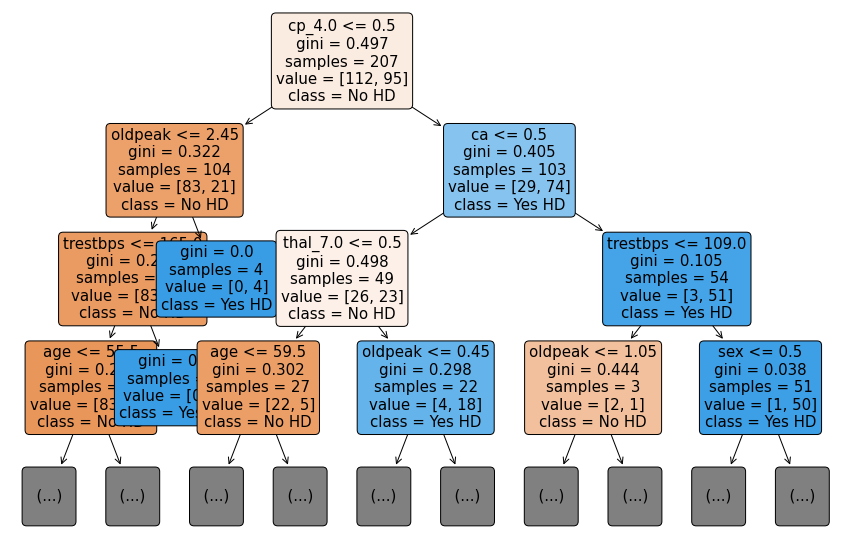

In [71]:
# plot a tree diagram
plt.figure(figsize = (15, 10))
plot_tree(model, filled = True,
          rounded = True,
          class_names = ['No HD', 'Yes HD'],
          feature_names = X_encoded.columns, max_depth=3, fontsize=15);

**Prediction**

In [72]:
y_pred = model.predict(X_test)

**Prediction Comparison with the test data**

In [73]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['pred']= y_pred
y_test.sample(10)

,hd,probability,pred
137,1,0.0,0
133,0,0.0,0
67,0,0.0,0
214,1,1.0,1
295,0,0.0,0
278,1,0.0,0
262,0,0.0,0
33,0,1.0,1
265,1,0.0,0
213,1,0.0,0


**Model performance evaluation** use confusion matrix, accuracy, classificatin report, area under the curve(AUC) to know model performance.

**Confusion Matrix**

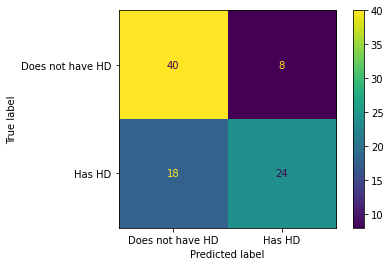

In [74]:
plot_confusion_matrix(model, X_test, y_test['hd'], display_labels = ['Does not have HD','Has HD'])
plt.show()

**Comment:**
In the confusion matrix, **40 + 8 = 48** people that did not have Heart Disease, **40 (83%)** were correctly classified. **18 + 24 = 42 **people that have **Heart Disease**, **25 (59.52%)** were correctly classified.

**Accuracy**

In [75]:
print('Accuracy: ', accuracy_score(y_test['hd'],y_test['pred']))

Accuracy:  0.7111111111111111


**Model accuracy** is **71%** means that 29 of every 100 labels is incorrect, and 71 is correct for predicting **Heart disease**.

**Classification report**

In [76]:
class_report = classification_report(y_test['hd'], 
                                     y_test['pred'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.83      0.75        48
           1       0.75      0.57      0.65        42

    accuracy                           0.71        90
   macro avg       0.72      0.70      0.70        90
weighted avg       0.72      0.71      0.71        90



**Comment:** 
1. **Precision**= Out of all the examples that predicted as positive, how many are really positive?
 here 75% means that model predicted as positive(**has heart disease**) **(24 + 8 =32**), but really positive (**has heart disease)** only 24 people.

3. **Recall/sensitivity** = Out of all the positive examples, how many are predicted as positive?
Here **57%** means that  all positive are (**18 +24 = 42**), but model predicted as positive only **24**
4.  **F1-score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Here Model F1-score is **0.65**
5. **Support:**Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

**ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve**

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

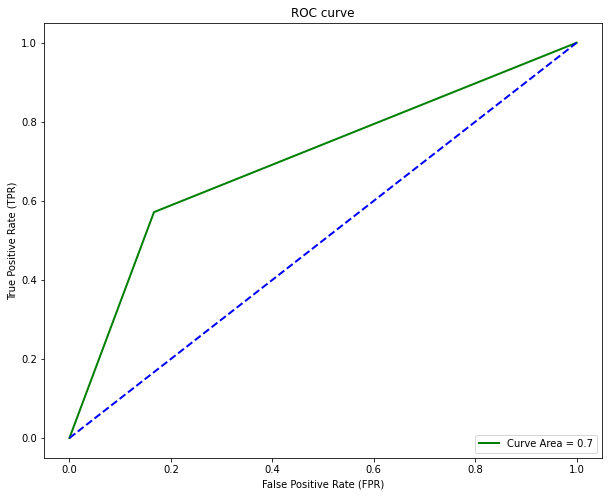

In [77]:
fpr, tpr, thr = roc_curve(y_test['hd'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['hd'], 
                             y_test['pred']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

**Comment:** Here model AUC value is 0.7 that means the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.